In [35]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('cleaned_data.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       275 non-null    object 
 1   Name             275 non-null    object 
 2   Email            275 non-null    object 
 3   Age              275 non-null    float64
 4   Country          275 non-null    object 
 5   SignupDate       275 non-null    object 
 6   LastLogin        275 non-null    object 
 7   TotalPurchase    275 non-null    float64
 8   Feedback         185 non-null    object 
 9   CartValue        275 non-null    float64
 10  DiscountApplied  275 non-null    float64
dtypes: float64(4), object(7)
memory usage: 23.8+ KB


# **Finding Outliers using `3-Sigma Rule` (Z-Score Method)**

The **3-sigma rule** assumes a **normal distribution**:

* 68% data lies within ±1σ
* 95% within ±2σ
* 99.7% within ±3σ

So, **values beyond ±3 standard deviations (σ)** are considered **outliers**.



| Term      | Meaning                                 |  
| --------- | --------------------------------------- |
| σ (sigma) | Standard deviation                      |  
| Z-score   | How many std deviations a value is away |    
| z > 3 | Mark it as an **`outlier`** |



In [38]:
# Function to detect Outliers in 1D dataset
def find_anomalies(data):
    # Define a list to store outliers
    outliers = []

    # set upper and lower limit to 3 standard deviations
    sd = statistics.stdev(data)
    mean = statistics.mean(data)

    cut_off = sd * 3

    upper_limit = mean + cut_off
    lower_limit = mean - cut_off

    # Generate outliers
    for i in data:
        if i > upper_limit or i < lower_limit:
            outliers.append(i)
    
    return outliers

In [39]:
data.DiscountApplied

0      50.0
1       0.0
2      20.0
3      10.0
4      15.0
       ... 
270    10.0
271    20.0
272     5.0
273     5.0
274     5.0
Name: DiscountApplied, Length: 275, dtype: float64

In [40]:
list1 = find_anomalies(data.DiscountApplied)

In [41]:
list1

[50.0]

One Outlier is present here

In [42]:
len(list1)/len(data) * 100

0.36363636363636365

0.3 percent od data in in outliers range<br>If this range would be more, that would mean that data is not normally distributed.

In [43]:
data.DiscountApplied.skew() # aproximatly normal

np.float64(0.7296601014487158)

In [44]:
# Manually creating array which is not normally distributed
np.random.seed(0)
normal_data = np.random.normal(loc=50, scale=5, size=1000)

# Add some outliers
outliers = np.array([150, 160, 170, 180, 190] * 6)  # 30 outliers
data_with_outliers = np.concatenate([normal_data, outliers])

In [45]:
list2 = find_anomalies(data_with_outliers)

In [46]:
print(len(list2))

30


In [47]:
len(list2) / len(data_with_outliers) * 100

2.912621359223301

2% Outliers<br>Not normally distributed

In [48]:
df = pd.DataFrame(data_with_outliers, columns=["Value"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1030 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [50]:
df.skew()

Value    5.248302
dtype: float64

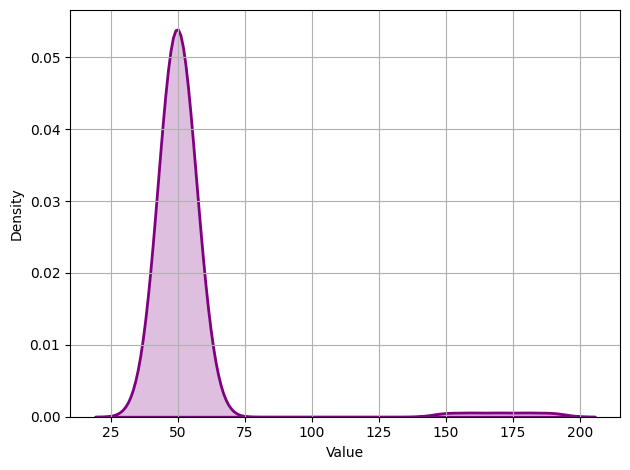

In [51]:
sns.kdeplot(df.Value, fill=True, color="purple", linewidth=2)
plt.grid(True)
plt.tight_layout() # to avoid the plot being cut off
plt.show()

It is left skewed

In [52]:
# Transform the data into logarithmic scale
df.Value = np.log(df.Value)

In [ ]:
df.skew() # skewness reduced

Value    4.049216
dtype: float64

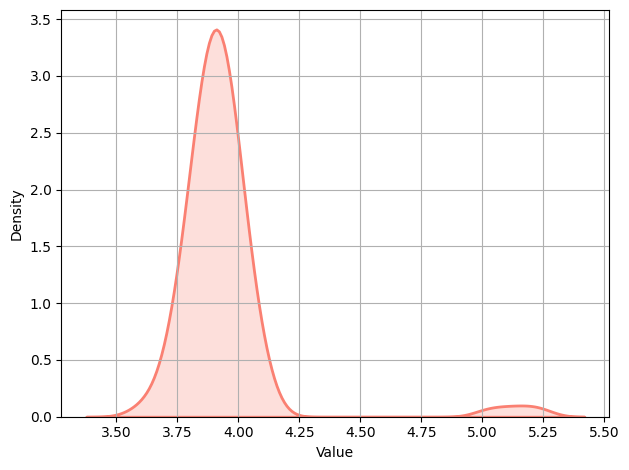

In [53]:
sns.kdeplot(df.Value, fill=True, color="salmon", linewidth=2)
plt.grid(True)
plt.tight_layout() # to avoid the plot being cut off
plt.show()

In [55]:
list2 = find_anomalies(df.Value)
list2

[5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486,
 5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486,
 5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486,
 5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486,
 5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486,
 5.0106352940962555,
 5.075173815233827,
 5.135798437050262,
 5.19295685089021,
 5.247024072160486]

In [ ]:
len(list2) / len(df) * 100 # still same

2.912621359223301

In [57]:
# double transformation
df.Value = np.log(df.Value)

In [58]:
df.skew() # skewness reduced

Value    3.64748
dtype: float64

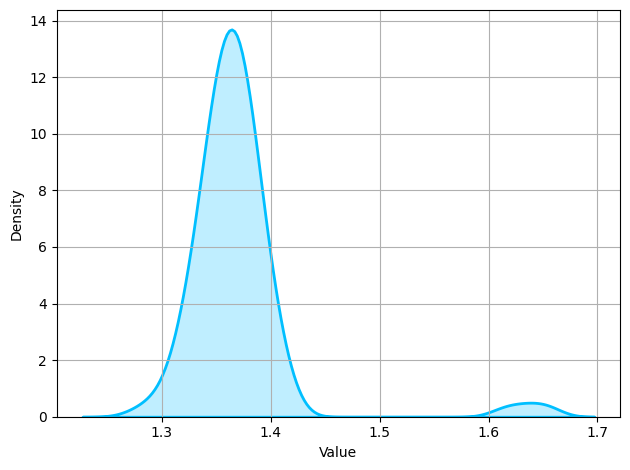

In [59]:
sns.kdeplot(df.Value, fill=True, color="deepskyblue", linewidth=2)
plt.grid(True)
plt.tight_layout() # to avoid the plot being cut off
plt.show()

In [60]:
list2 = find_anomalies(df.Value)
list2

[1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074,
 1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074,
 1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074,
 1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074,
 1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074,
 1.611562712266506,
 1.6243607736485148,
 1.6362353204949376,
 1.6473032557366176,
 1.657661072489074]

In [61]:
len(list2) / len(df) * 100 # still same

2.912621359223301

# `Boxplots`
### **What is a Boxplot?**

A **`boxplot`** (or box-and-whisker plot) is a visual way to show how data is spread and helps in **detecting outliers**.

It shows:

* **Median** (middle value)
* **Quartiles (Q1 & Q3)** – values that split data into 4 equal parts
* **IQR (Interquartile Range)** – the middle 50% of data:
  `IQR = Q3 - Q1`
* **Whiskers** – lines extending from the box to show the range (without outliers)

---

###  **What Are Outliers in a Boxplot?**

Outliers are values that are **too far from the rest** of the data.

📌 Outlier condition:

```plaintext
Any value < Q1 - 1.5 * IQR
Or
Any value > Q3 + 1.5 * IQR
```

These values are plotted as **dots** beyond the whiskers in the boxplot.

---

| Term     | Meaning                                       |
| -------- | --------------------------------------------- |
| Q1       | 25th percentile (lower quartile)              |
| Q3       | 75th percentile (upper quartile)              |
| IQR      | Q3 - Q1                                       |
| Outliers | Values outside `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` |



{'whiskers': [<matplotlib.lines.Line2D at 0x1276ff170>,
 'caps': [<matplotlib.lines.Line2D at 0x1276ff6b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1276fe9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1276ffc20>],
 'fliers': [<matplotlib.lines.Line2D at 0x127700200>],
 'means': [<matplotlib.lines.Line2D at 0x1276ffef0>]}

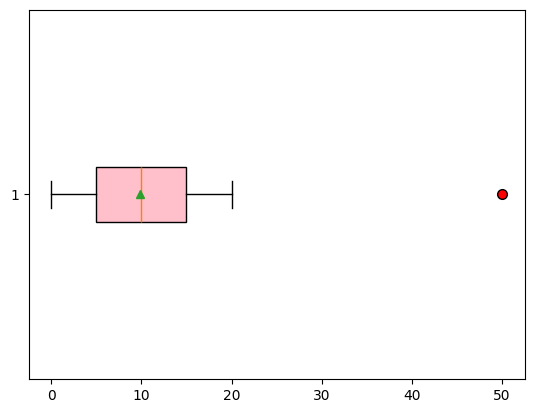

In [72]:
plt.boxplot(data.DiscountApplied,
           vert = False,
           patch_artist = True,
           showmeans = True,
           boxprops = dict(facecolor='pink'),
           flierprops=dict(marker='o', markersize=7, markerfacecolor='red'))

{'whiskers': [<matplotlib.lines.Line2D at 0x127709490>,
 'caps': [<matplotlib.lines.Line2D at 0x127709a90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1274e3f80>],
 'medians': [<matplotlib.lines.Line2D at 0x12770a180>],
 'fliers': [<matplotlib.lines.Line2D at 0x12770a750>],
 'means': [<matplotlib.lines.Line2D at 0x12770a420>]}

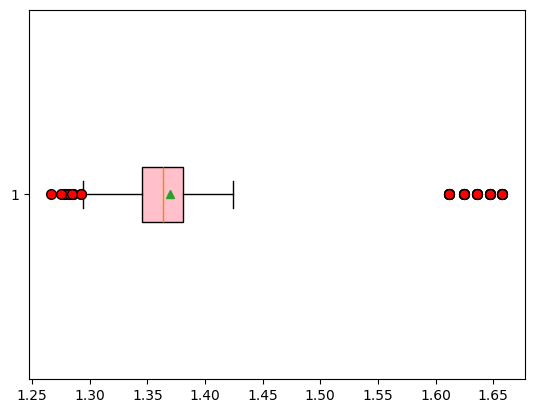

In [73]:
plt.boxplot(df.Value,
           vert = False,
           patch_artist = True,
           showmeans = True,
           boxprops = dict(facecolor='pink'),
           flierprops=dict(marker='o', markersize=7, markerfacecolor='red'))